### Introduction 

Toronto is the capital city of the Canadian province of Ontario. 

With a recorded population of 2,731,571 in 2016, it is the most populous city in Canada and the fourth most populous city in North America.

The city is the anchor of the Golden Horseshoe, an urban agglomeration of 9,245,438 people (as of 2016) surrounding the western end of Lake Ontario, 
while the Greater Toronto Area (GTA) proper had a 2016 population of 6,417,516. 

Toronto is an international centre of business, finance, arts, and culture, and is recognized as one of the most multicultural and cosmopolitan cities in the world.

The diverse population of Toronto reflects its current and historical role as an important destination for immigrants to Canada.

More than 50 percent of residents belong to a visible minority population group, and over 200 distinct ethnic origins are represented among its inhabitants.
While the majority of Torontonians speak English as their primary language, over 160 languages are spoken in the city.

Toronto is a prominent centre for music, theatre, motion picture production, and television production, 
and is home to the headquarters of Canada's major national broadcast networks and media outlets.

The city is home to the Toronto Stock Exchange, the headquarters of Canada's five largest banks, and the headquarters of many large Canadian and multinational corporations.
Its economy is highly diversified with strengths in technology, design, financial services, life sciences, education, arts, fashion, aerospace, environmental innovation, food services, and tourism.

I used to live in Canada (Montreal) for a few years and I visited Toronto very often. I really appreciated the atmosphere of this city, dynamic and relaxed at the same time. 

### Data

In order to answer the above questions, data on Toronto neighborhoods, boroughs to include boundaries, latitude, longitude are required.

Toronoto data containing the neighborhoods and boroughs, latitudes, and longitudes will be obtained from the data source: https://cocl.us/Geospatial_data.

All data related to locations will be obtained via the FourSquare API utilized via the Request library in Python.

### Methodology

• Data will be collected from http://cocl.us/Geospatial_data and cleaned and processed into a dataframe.

• FourSquare be used to locate and filtered all venues . 

• Data will be sorted based on rankings.

• Finally, the data be will be visually assessed using graphing from Python libraries.

### Problem Statement

1. What is / are the best location(s) in Toronto?
2. In what Neighborhood and/or borough we have the best chance of being successful in business?
3. Where would we go in Toronto to have the best experience?

#### Before we get the data and start exploring it, let's import all required libraries 

In [7]:
import pandas as pd # library for data analsysis
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import requests # library to handle requests

from bs4 import BeautifulSoup
import xml

import json # library to handle JSON files

#!conda install -c conda-forge folium=0.5.0 --yes
#import folium # map rendering library

#!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values


# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline

import seaborn as sns

print('Libraries imported.')

Libraries imported.


In [57]:
url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
source = requests.get(url).text

In [58]:
soup = BeautifulSoup(source, 'xml')

In [59]:
table=soup.find('table')


In [60]:
# The dataframe will consist of three columns: PostalCode, Borough, and Neighborhood

column_names = ['Postalcode','Borough', 'Neighborhood']
df = pd.DataFrame(columns = column_names)


for tr_cell in table.find_all('tr'):
    row_data=[]
    for td_cell in tr_cell.find_all('td'):
        row_data.append(td_cell.text.strip())
    if len(row_data)==3:
        df.loc[len(df)] = row_data
df.head()        

,Postalcode,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


In [62]:
# Only process the cells that have an assigned borough. Ignore cells with a borough that is Not assigneddf=df[df['Borough']!='Not assigned']
df=df[df['Borough']!='Not assigned']
df.head()

,Postalcode,Borough,Neighborhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


More than one neighborhood can exist in one postal code area. These rows will be combined into one row with the neighborhoods separated with a comma.

In [63]:
df1=df.groupby('Postalcode')['Neighborhood'].apply(lambda x: "%s" % ', '.join(x))
df1=df1.reset_index(drop=False)
df1.rename(columns={'Neighborhood':'Neighborhood_joined'},inplace=True)

df2 = pd.merge(df, df1, on='Postalcode')
df2.drop(['Neighborhood'],axis=1,inplace=True)
df2.drop_duplicates(inplace=True)
df2.rename(columns={'Neighborhood_joined':'Neighborhood'},inplace=True)
df2

,Postalcode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
6,M1B,Scarborough,"Malvern, Rouge"
7,M3B,North York,Don Mills
8,M4B,East York,"Parkview Hill, Woodbine Gardens"
9,M5B,Downtown Toronto,"Garden District, Ryerson"


In [64]:
df2.shape

(103, 3)

#### Read csv file that has the geographical coordinates of each postal code

In [65]:
geo_df=pd.read_csv('http://cocl.us/Geospatial_data')
geo_df.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


#### Merge this file with df2

In [66]:
geo_df.rename(columns={'Postal Code':'Postalcode'},inplace=True)
geo_merge = pd.merge(geo_df, df2, on='Postalcode')
geo_merge

,Postalcode,Latitude,Longitude,Borough,Neighborhood
0,M1B,43.806686,-79.194353,Scarborough,"Malvern, Rouge"
1,M1C,43.784535,-79.160497,Scarborough,"Rouge Hill, Port Union, Highland Creek"
2,M1E,43.763573,-79.188711,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,43.770992,-79.216917,Scarborough,Woburn
4,M1H,43.773136,-79.239476,Scarborough,Cedarbrae
5,M1J,43.744734,-79.239476,Scarborough,Scarborough Village
6,M1K,43.727929,-79.262029,Scarborough,"Kennedy Park, Ionview, East Birchmount Park"
7,M1L,43.711112,-79.284577,Scarborough,"Golden Mile, Clairlea, Oakridge"
8,M1M,43.716316,-79.239476,Scarborough,"Cliffside, Cliffcrest, Scarborough Village West"
9,M1N,43.692657,-79.264848,Scarborough,"Birch Cliff, Cliffside West"


#### Set order of columns

In [67]:
cols_to_order = ['Latitude','Longitude']
new_columns =  (geo_merge.columns.drop(cols_to_order).tolist()) + cols_to_order
geo_data = geo_merge[new_columns]
geo_data.head()

,Postalcode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


In [68]:
toronto_data=geo_data[geo_data['Borough'].str.contains("Toronto")]
toronto_data.head()

,Postalcode,Borough,Neighborhood,Latitude,Longitude
37,M4E,East Toronto,The Beaches,43.676357,-79.293031
41,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188
42,M4L,East Toronto,"India Bazaar, The Beaches West",43.668999,-79.315572
43,M4M,East Toronto,Studio District,43.659526,-79.340923
44,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790


### Initial Data Analysis

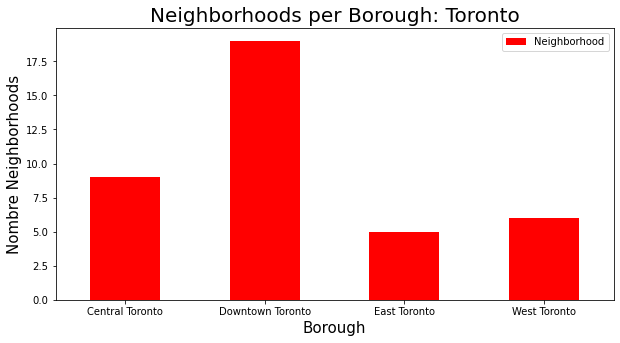

In [74]:
clr = "red"
toronto_data.groupby('Borough')['Neighborhood'].count().plot.bar(figsize=(10,5), color=clr)
plt.title('Neighborhoods per Borough: Toronto', fontsize = 20)
plt.xlabel('Borough', fontsize = 15)
plt.ylabel('Nombre Neighborhoods',fontsize = 15)
plt.xticks(rotation = 'horizontal')
plt.legend()
plt.show()

### Explore Neighborhoods in Toronto

In [77]:
CLIENT_ID = 'xxxxx' # your Foursquare ID

CLIENT_SECRET = 'yyyy' # your Foursquare Secret

VERSION = 'zzzz'

In [78]:
def getNearbyVenues(names, latitudes, longitudes):
    radius=500
    LIMIT=100
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [79]:
toronto_venues = getNearbyVenues(names=toronto_data['Neighborhood'],
                                   latitudes=toronto_data['Latitude'],
                                   longitudes=toronto_data['Longitude']
                                  )

The Beaches
The Danforth West, Riverdale
India Bazaar, The Beaches West
Studio District
Lawrence Park
Davisville North
North Toronto West,  Lawrence Park
Davisville
Moore Park, Summerhill East
Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park
Rosedale
St. James Town, Cabbagetown
Church and Wellesley
Regent Park, Harbourfront
Garden District, Ryerson
St. James Town
Berczy Park
Central Bay Street
Richmond, Adelaide, King
Harbourfront East, Union Station, Toronto Islands
Toronto Dominion Centre, Design Exchange
Commerce Court, Victoria Hotel
Roselawn
Forest Hill North & West, Forest Hill Road Park
The Annex, North Midtown, Yorkville
University of Toronto, Harbord
Kensington Market, Chinatown, Grange Park
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport
Stn A PO Boxes
First Canadian Place, Underground city
Christie
Dufferin, Dovercourt Village
Little Portugal, Trinity
Brockton, Parkdale Village, Exhibition Place
High

In [80]:
toronto_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,The Beaches,43.676357,-79.293031,Glen Manor Ravine,43.676821,-79.293942,Trail
1,The Beaches,43.676357,-79.293031,The Big Carrot Natural Food Market,43.678879,-79.297734,Health Food Store
2,The Beaches,43.676357,-79.293031,Grover Pub and Grub,43.679181,-79.297215,Pub
3,The Beaches,43.676357,-79.293031,Upper Beaches,43.680563,-79.292869,Neighborhood
4,"The Danforth West, Riverdale",43.679557,-79.352188,Pantheon,43.677621,-79.351434,Greek Restaurant


In [81]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 235 uniques categories.


In [82]:
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Berczy Park,55,55,55,55,55,55
"Brockton, Parkdale Village, Exhibition Place",23,23,23,23,23,23
"Business reply mail Processing Centre, South Central Letter Processing Plant Toronto",16,16,16,16,16,16
"CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport",16,16,16,16,16,16
Central Bay Street,68,68,68,68,68,68
Christie,16,16,16,16,16,16
Church and Wellesley,75,75,75,75,75,75
"Commerce Court, Victoria Hotel",100,100,100,100,100,100
Davisville,33,33,33,33,33,33


In [83]:
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")
toronto_onehot.drop(['Neighborhood'],axis=1,inplace=True) 
toronto_onehot.insert(loc=0, column='Neighborhood', value=toronto_venues['Neighborhood'] )
toronto_onehot.shape

(1624, 235)

In [84]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped.head()

,Neighborhood,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Cafeteria,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Escape Room,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hospital,Hostel,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indoor Play Area,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts School,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soup Place,Southern / Soul Food Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Swim School,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Yoga Studio
0,Berczy Park,0.0,0.0000,0.0000,0.0000,0.000,0.000,0.0000,0.0,0.0,0.0,0.018182,0.000000,0.0,0.0,0.0,0.0000,0.0,0.0,0.018182,0.036364,0.0,0.000000,0.0,0.018182,0.018182,0.0,0.036364,0.0,0.0,0.018182,0.0000,0.000000,0.0000,0.0,0.018182,0.0000,0.000000,0.0,0.000000,0.000000,0.0,0.0000,0.018182,0.0,0.0,0.0,0.0,0.036364,0.0,0.0,0.0,0.000000,0.0,0.036364,0.090909,0.0,0.0,0.0,0.0,0.0,0.0,0.018182,0.000000,0.018182,0.000000,0.0,0.0,0.018182,0.0,0.0,0.0,0.0,0.018182,0.000000,0.0,0.018182,0.000000,0.0,0.0,0.0,0.000000,0.0,0.018182,0.0,0.0,0.0,0.0,0.000000,0.036364,0.0000,0.0,0.0,0.018182,0.0,0.0,0.0,0.0,

####  Let's print each neighborhood along with the top 5 most common venues

In [85]:
num_top_venues = 5

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Berczy Park----
            venue  freq
0     Coffee Shop  0.09
1     Cheese Shop  0.04
2      Restaurant  0.04
3          Bakery  0.04
4  Farmers Market  0.04


----Brockton, Parkdale Village, Exhibition Place----
            venue  freq
0            Café  0.13
1       Nightclub  0.09
2     Coffee Shop  0.09
3  Breakfast Spot  0.09
4             Gym  0.04


----Business reply mail Processing Centre, South Central Letter Processing Plant Toronto----
           venue  freq
0           Park  0.06
1  Auto Workshop  0.06
2        Brewery  0.06
3     Skate Park  0.06
4  Burrito Place  0.06


----CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport----
              venue  freq
0    Airport Lounge  0.12
1   Airport Service  0.12
2   Harbor / Marina  0.06
3             Plane  0.06
4  Sculpture Garden  0.06


----Central Bay Street----
                venue  freq
0         Coffee Shop  0.18
1                Café  0.06
2      Sandwich Pl

#### Function to sort the venues in descending order

In [86]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [88]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(20)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berczy Park,Coffee Shop,Farmers Market,Bakery,Cocktail Bar,Beer Bar,Seafood Restaurant,Cheese Shop,Restaurant,Italian Restaurant,Beach
1,"Brockton, Parkdale Village, Exhibition Place",Café,Breakfast Spot,Nightclub,Coffee Shop,Climbing Gym,Burrito Place,Restaurant,Italian Restaurant,Intersection,Bar
2,"Business reply mail Processing Centre, South C...",Skate Park,Burrito Place,Butcher,Fast Food Restaurant,Light Rail Station,Auto Workshop,Farmers Market,Restaurant,Pizza Place,Recording Studio
3,"CN Tower, King and Spadina, Railway Lands, Har...",Airport Lounge,Airport Service,Boutique,Harbor / Marina,Sculpture Garden,Boat or Ferry,Rental Car Location,Bar,Coffee Shop,Plane
4,Central Bay Street,Coffee Shop,Café,Sandwich Place,Italian Restaurant,Japanese Restaurant,Bubble Tea Shop,Burger Joint,Department Store,Salad Place,Thai Restaurant
5,Christie,Grocery Store,Café,Park,Baby Store,Coffee Shop,Athletics & Sports,Restaurant,Italian Restaurant,Nightclub,Candy Store
6,Church and Wellesley,Coffee Shop,Gay Bar,Sushi Restaurant,Japanese Restaurant,Restaurant,Café,Hotel,Mediterranean Restaurant,Yoga Studio,Men's Store
7,"Commerce Court, Victoria Hotel",Coffee Shop,Restaurant,Café,Hotel,Gym,American Restaurant,Seafood Restaurant,Deli / Bodega,Italian Restaurant,Japanese Restaurant
8,Davisville,Pizza Place,Sandwich Place,Dessert Shop,Café,Coffee Shop,Gym,Italian Restaurant,Sushi Restaurant,Diner,Indoor Play Area
9,Davisville North,Park,Sandwich Place,Hotel,Dance Studio,Food & Drink Shop,Dog Run,Department Store,Gym / Fitness Center,Breakfast Spot,Donut Shop


#### Cluster Neighborhoods

Run k-means to cluster the neighborhood into 5 clusters.

In [89]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 5

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

#### New dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [90]:
toronto_merged = toronto_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

toronto_merged.head() 

,Postalcode,Borough,Neighborhood,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
37,M4E,East Toronto,The Beaches,43.676357,-79.293031,Pub,Trail,Health Food Store,Yoga Studio,Distribution Center,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Doner Restaurant
41,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188,Greek Restaurant,Coffee Shop,Italian Restaurant,Restaurant,Furniture / Home Store,Bookstore,Ice Cream Shop,Pub,Pizza Place,Lounge
42,M4L,East Toronto,"India Bazaar, The Beaches West",43.668999,-79.315572,Park,Sandwich Place,Ice Cream Shop,Fish & Chips Shop,Pub,Steakhouse,Sushi Restaurant,Italian Restaurant,Pizza Place,Burrito Place
43,M4M,East Toronto,Studio District,43.659526,-79.340923,Coffee Shop,Café,Gastropub,American Restaurant,Brewery,Bakery,Yoga Studio,Bar,Ice Cream Shop,Fish Market
44,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790,Park,Bus Line,Swim School,Colombian Restaurant,Dessert Shop,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Donut Shop,Doner Restaurant


In [91]:
address = 'Toronto, CA'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


In [ ]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters